## **Importing necessary libraries**

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to suppress warnings
import warnings

warnings.filterwarnings("ignore")

: 

## **Loading the data**

In [ ]:
# run if using Google Colab
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv("/content/drive/MyDrive/DSML Colabs/Projects/Customer_Personality_Segmentation.csv", sep="\t")

Mounted at /content/drive


In [ ]:
# if NOT using Google Colab
data = pd.read_csv("Customer_Personality_Segmentation.csv", sep="\t")

## **Data Overview**

#### Checking the data types of the columns




In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

##### **Observations:**
the data types are mostly int64s, with some objects and one float64.

#### Checking the statistical summary of the data. What is the average household income?

In [ ]:
data.describe().T



,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


##### **Observations:**
data['Income'].mean() could also specifically return the mean of the 'Income' column.

52247.25135379061 is the avg household income

#### Checking for missing values in the data and treating them accordingly.

In [ ]:
data.isna().sum()
data.fillna(0, inplace=True)


In [ ]:
data.isna().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


##### **Observations:**
There were 24 NaN values in Income, and I replaced them all with zeroes

#### Checking for any duplicates in the data.

In [ ]:
data[data.duplicated()==True]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


##### **Observations:**
There are no duplicates in the data.


## **Exploratory Data Analysis**

### Univariate Analysis

#### Exploring all the variables and provide observations on their distributions. (histograms and boxplots)

In [ ]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [ ]:
data.pop('ID') # this would remove the ID column from the EDA, since these are just identifiers for the customers

,ID
0,5524
1,2174
2,4141
3,6182
4,5324
...,...
2235,10870
2236,4001
2237,7270
2238,8235


Year_Birth
Skew : -0.35


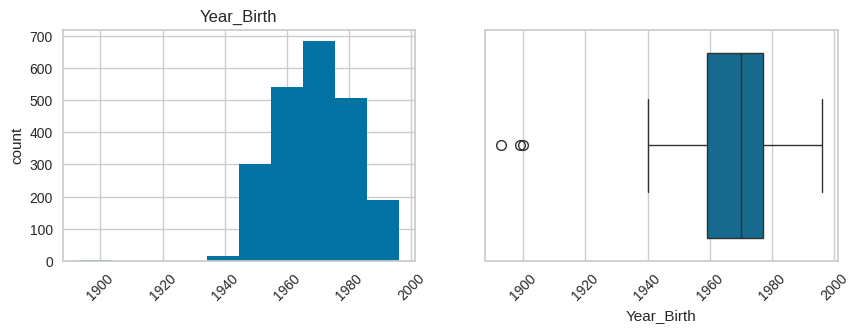

Education


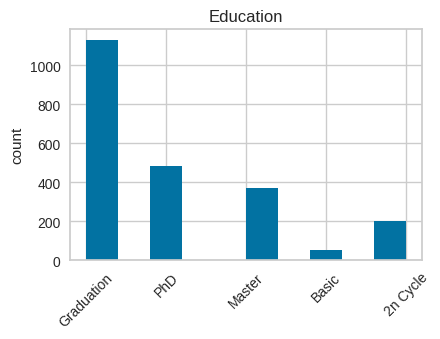

Marital_Status


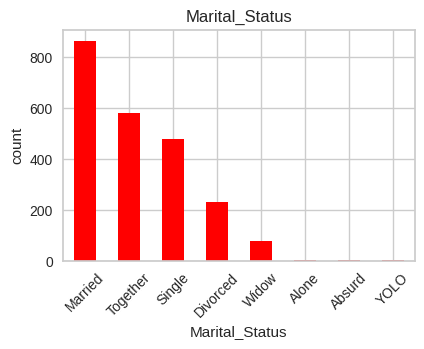

Income
Skew : 6.33


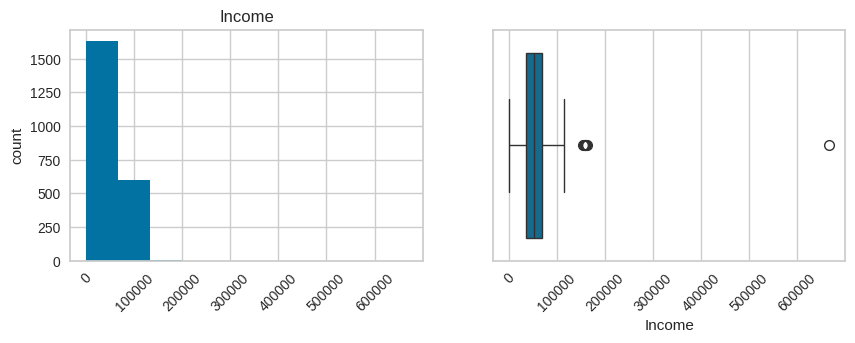

Kidhome
Skew : 0.64


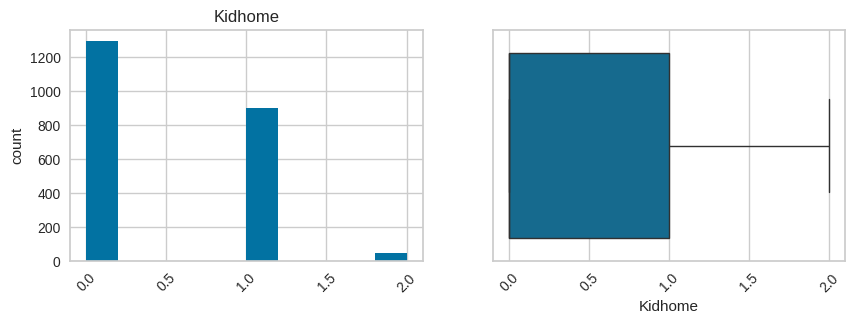

Teenhome
Skew : 0.41


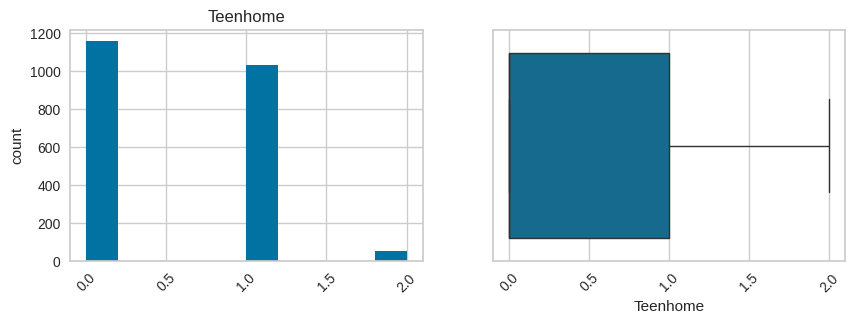

Recency
Skew : -0.0


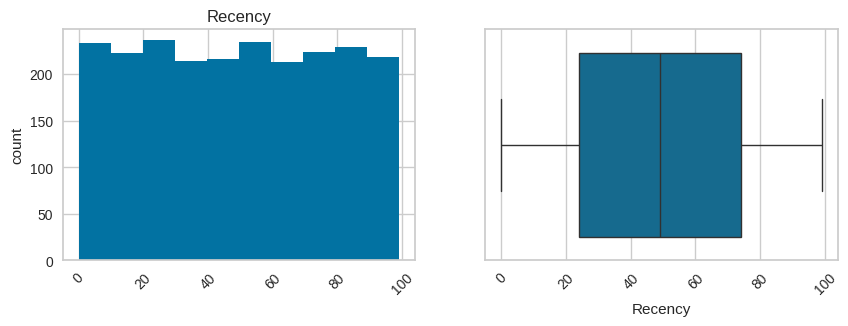

MntWines
Skew : 1.18


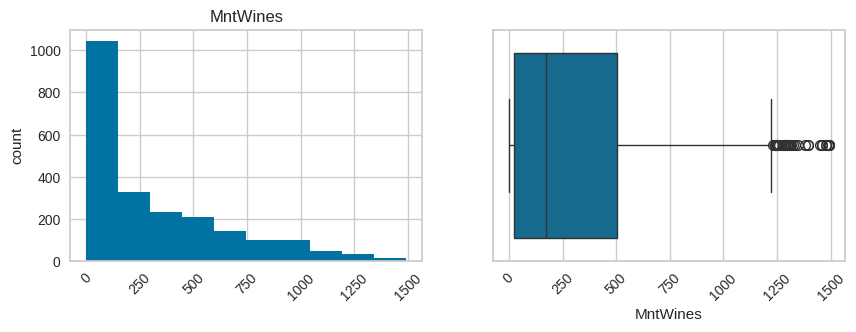

MntFruits
Skew : 2.1


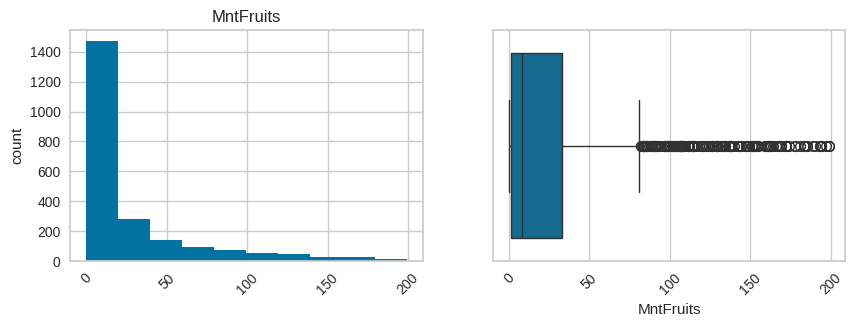

MntMeatProducts
Skew : 2.08


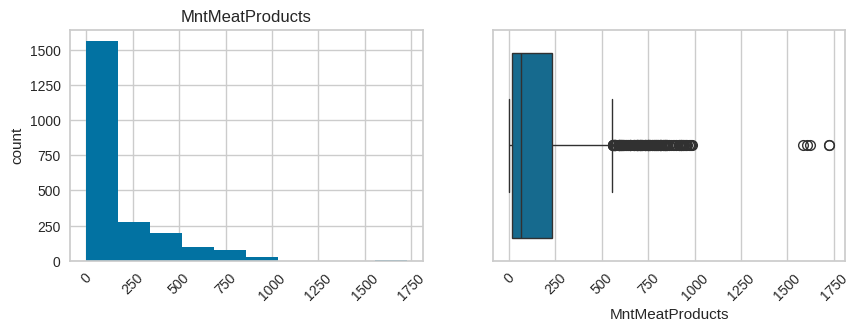

MntFishProducts
Skew : 1.92


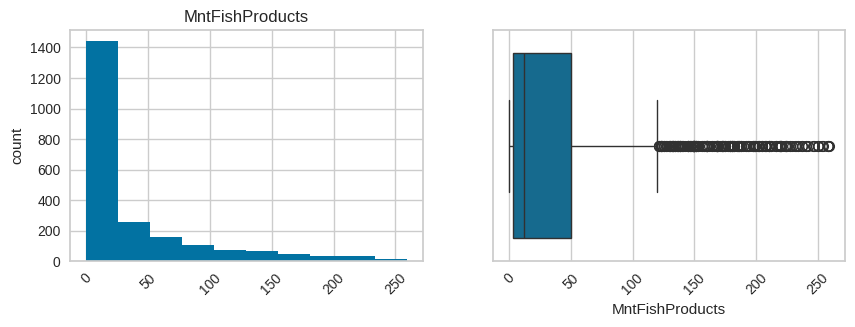

MntSweetProducts
Skew : 2.14


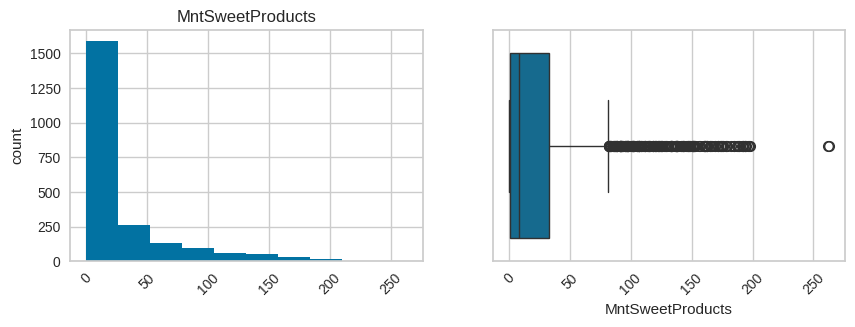

MntGoldProds
Skew : 1.89


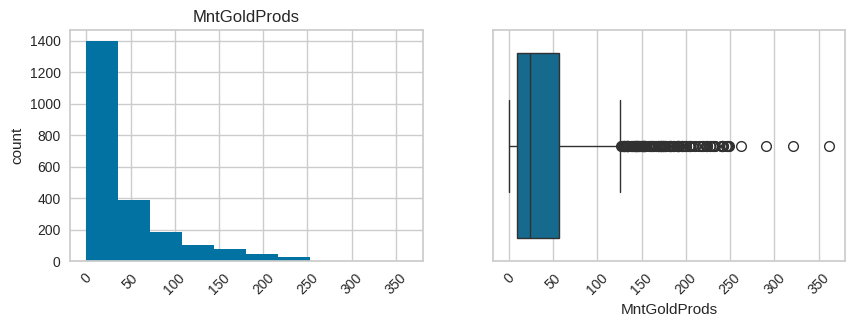

NumDealsPurchases
Skew : 2.42


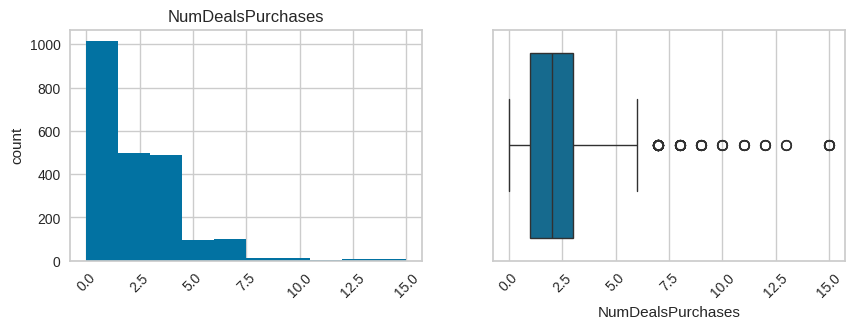

NumWebPurchases
Skew : 1.38


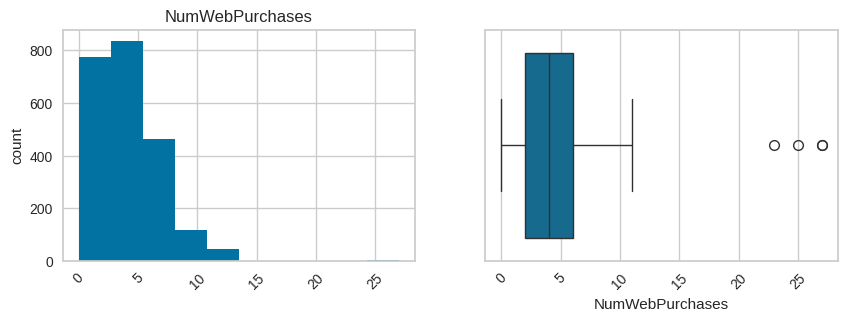

NumCatalogPurchases
Skew : 1.88


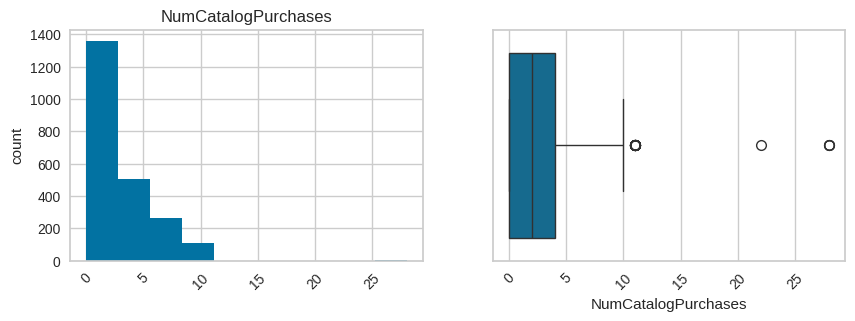

NumStorePurchases
Skew : 0.7


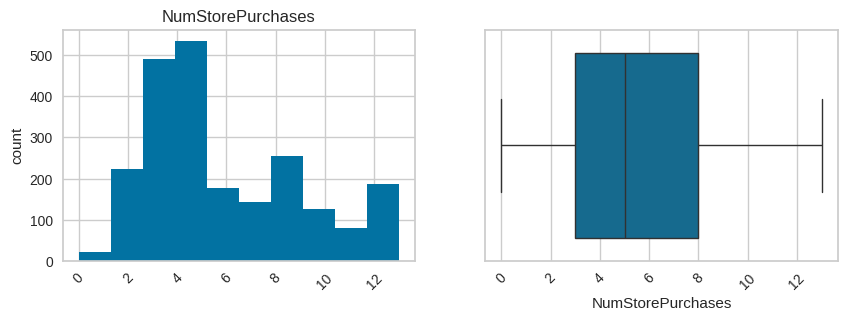

NumWebVisitsMonth
Skew : 0.21


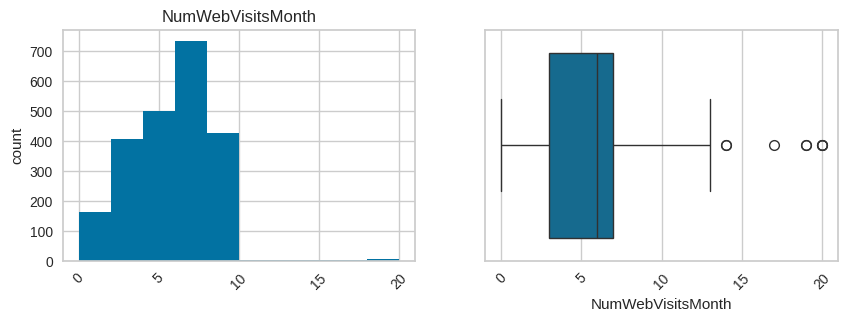

In [ ]:
for col in data.columns:

    if col == 'Dt_Customer' or col=='Z_Revenue' or col=='Z_CostContact':
      continue

    if col == 'AcceptedCmp3':
      break

    print(col)
    if data[col].dtype != object:
    # Not a string (could be numeric, datetime, etc.)
      print('Skew :',round(data[col].skew(),2))
    plt.figure(figsize=(10,3))
    plt.subplot(1,2,1)
    if col == 'Marital_Status':
      data[col].value_counts().plot(kind='bar',color='red')
    else:
      data[col].hist(grid=True)
    plt.title(col)
    plt.xticks(rotation=45)
    plt.ylabel('count')
    if data[col].dtype != object:
      plt.subplot(1,2,2)
      sns.boxplot(x=data[col])
      plt.xticks(rotation=45)


    plt.show()

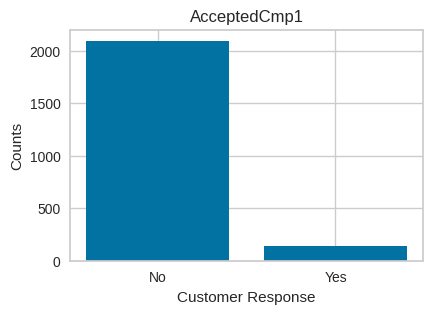

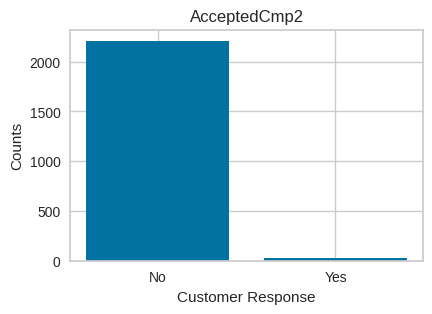

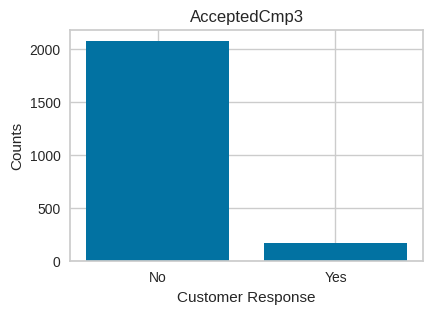

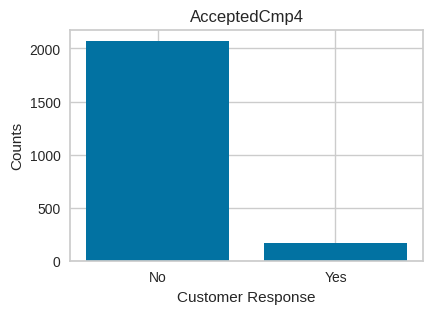

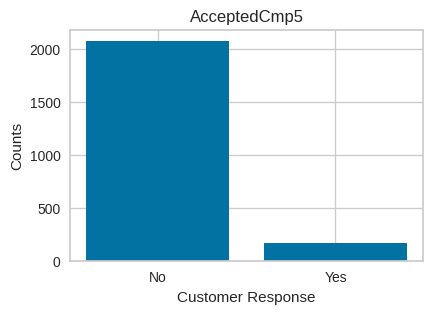

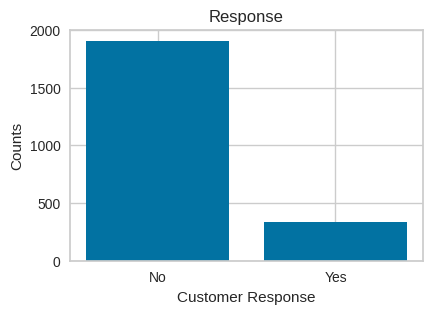

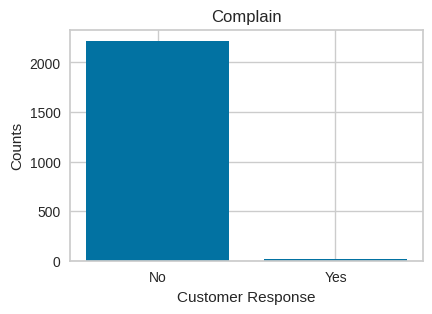

In [ ]:
yesNoData = data.loc[ : , ['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response','Complain']]
yesNoData.head()

for col in yesNoData.columns:
  plt.figure(figsize=(10,3))
  plt.subplot(1,2,1)

  mapping = yesNoData[col].map({0 : 'No', 1 : 'Yes'})
  counts = mapping.value_counts()

  plt.bar(x=counts.index, height=counts.values)
  plt.xlabel('Customer Response')
  plt.ylabel('Counts')
  plt.title(col)
  plt.show()

**Observations**

Year_Birth : Most of the customers are born around 1970, and there is a normal distribution centered around this point.

Education : The  majority of the customers are of 'Graduation' education level.

Marital Status : Most of the customers are married.

Income : The income distribution seems very right skewed due to an outlier shown in the boxplot.

Kidhome : Most customers have no kids, and some have one, and a few customers have two. (Note: Boxplot can be ignored.)

Teenhome : Most customers have 0 or 1 teens, and very little have 2. (Note: Boxplot can be ignored.)

Recency : There is a uniform distribution for recency.

---

*Products -- most of these distributions are right-skewed*


  MntWines : there is a very right skewed distribution for the amount of wines

  MntFruits : There is also a very right skewed distribution.

  MntMeatProducts : Right skewed.

  MntFishProducts : Right skewed.

  MntSweetProducts : Right skewed.

  MntGoldProds : Right skewed.

---

NumDealsPurchases : Also right skewed.

NumWebPurchases : Slightly right skewed.

NumCatalogPurchases : Right skewed.

NumStorePurchases : Slightly right skewed, we see some variation in the data.

NumWebVisitsMonth : A slight left skew; most customers visit around 5-7 times per month.

---

AcceptedCmps ⁉
Most of the customers said 'No' in all campaigns, but the least amount of 'Yes' responses was in Cmp2.

Response : most said 'No' but in this last campaign, we had the most amount of customers saying 'Yes' compared to the other campaigns.

---

Complain : very little customers complained.








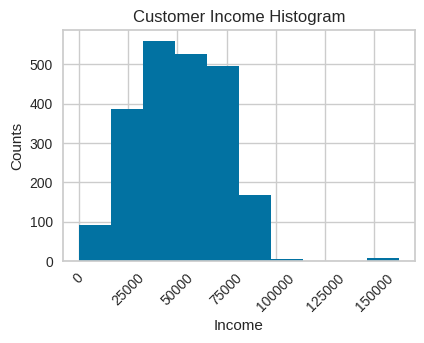

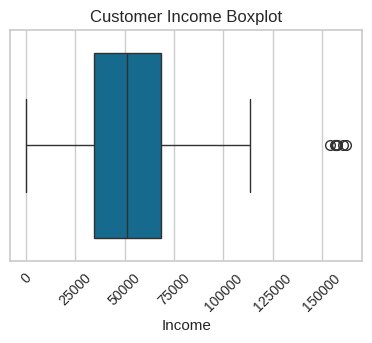

Skew:  0.25451754218743433


In [ ]:
data['Income'].max()
incomeNoOutlier = data['Income'][data['Income'] < 600000]

plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
incomeNoOutlier.hist()
plt.xlabel('Income')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.title('Customer Income Histogram')

plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
sns.boxplot(x=incomeNoOutlier)
plt.xticks(rotation=45)
plt.title('Customer Income Boxplot')

plt.show();
print("Skew: ", incomeNoOutlier.skew())
data = data.drop(data[data['Income'] > 600000].index) # just drops that data for the outlier above 600000 income

**Observation**

Upon removing the outlier at around $600000, we can take a closer look at the distribution of income. We can see that there is a slightly right skewed distribution with a median at 50000.

**Observation**
The Dt_Customer column should be in a linegraph, as those are times.

<Axes: xlabel='Dt_Customer'>

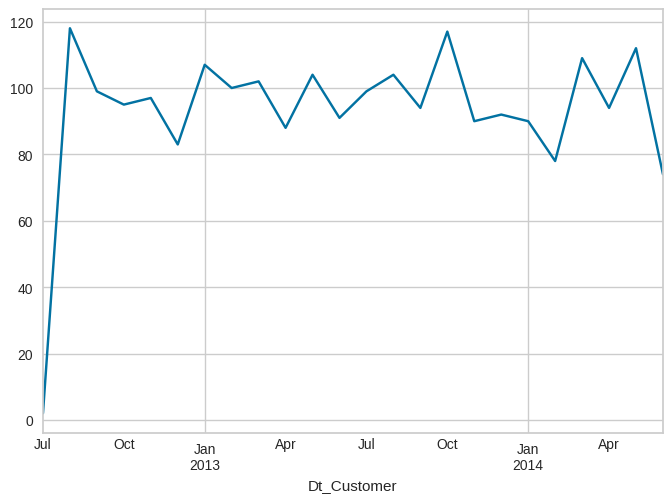

In [ ]:
data['Dt_Customer'].dtype
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], dayfirst=True) # Converting to datetime objects
data.set_index('Dt_Customer').resample('M').size().plot(kind='line') # groups the data by Month and puts them in a line graph


**Observations**

We can see that there is a uniform distribution in the dates that the customers enrolled.


### Bivariate Analysis

#### Performing multivariate analysis to explore the relationsips between the variables.



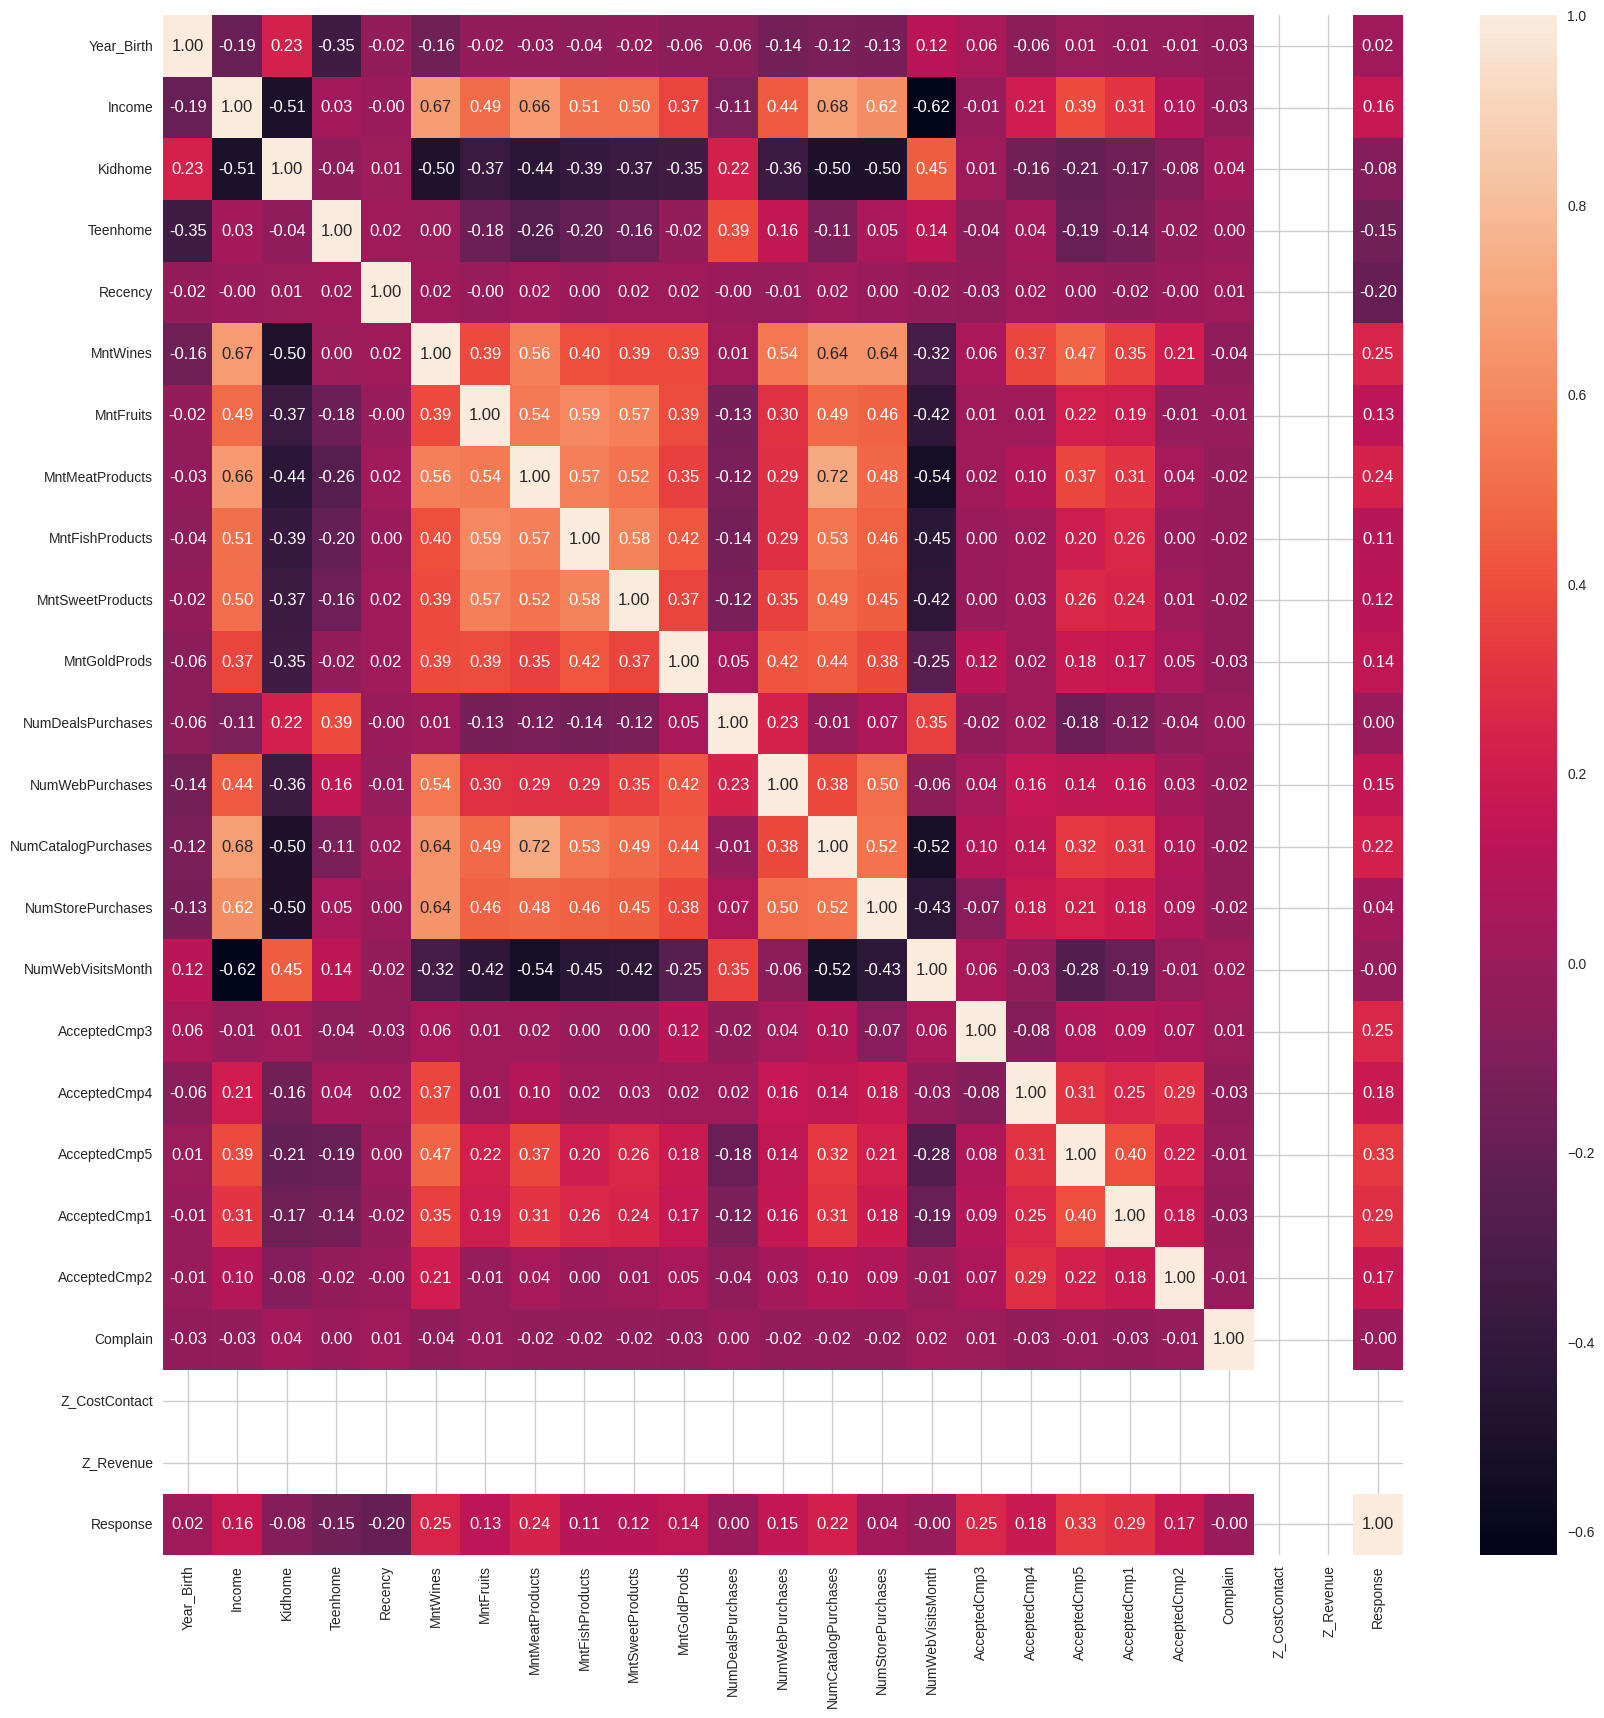

In [ ]:
# Write your code here
plt.figure(figsize=(20,20))
numData = data.select_dtypes(include='number')
numData
sns.heatmap(numData.corr(), annot=True, fmt='0.2f')
plt.show()

##### **Observations:**

The variables with the highest correlation coeffiicient seems to be NumCatalogPurchases and MntMeatProducts with 0.72.

We see that there seems to be little correlation between the 'Year_Birth'  across the other variables. The same goes for 'Complain', and 'AcceptedCmp2', and 'AcceptedCmp3'.


This heatmap is very big and is very confusing so I will plot heatmaps on each category of variables

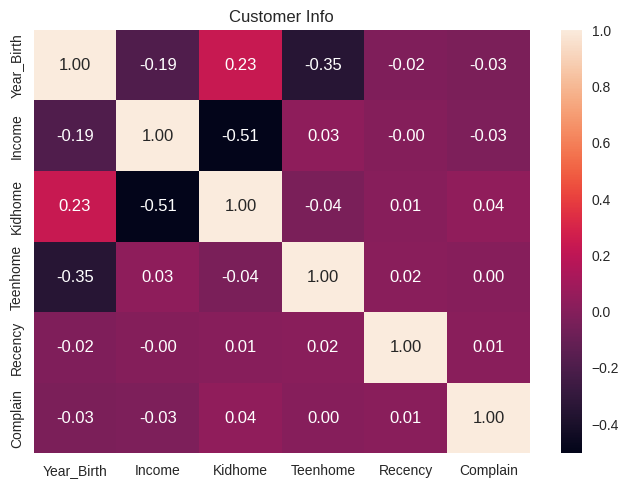

In [ ]:
numData.head()
CustInfo = numData.loc[: , ['Year_Birth', 'Income','Kidhome','Teenhome','Recency','Complain']]
sns.heatmap(CustInfo.corr(), annot=True, fmt='0.2f')
plt.title('Customer Info')
plt.show()

There seems to be a negative correlation between the customers' incomes and the amount of kids they have at home, meaning that the more kids they have, the less income they have.
There is also a slight negative correlation between the customers' birthyear and the amount of teens they have at home, meaning that younger customers tend to have less teens at home.

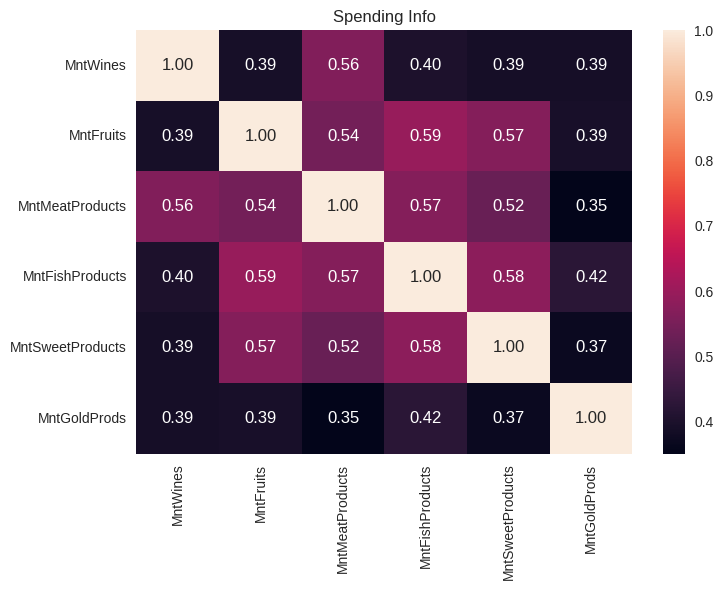

In [ ]:
SpendInfo = numData.loc[: , ['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']]
sns.heatmap(SpendInfo.corr(), annot=True, fmt='0.2f')
plt.title('Spending Info')
plt.show()

For the spending info, the correlations between the variables seem to be weaker, with no negative correlations and only little to moderate correlations between the amount of products the customers buy.

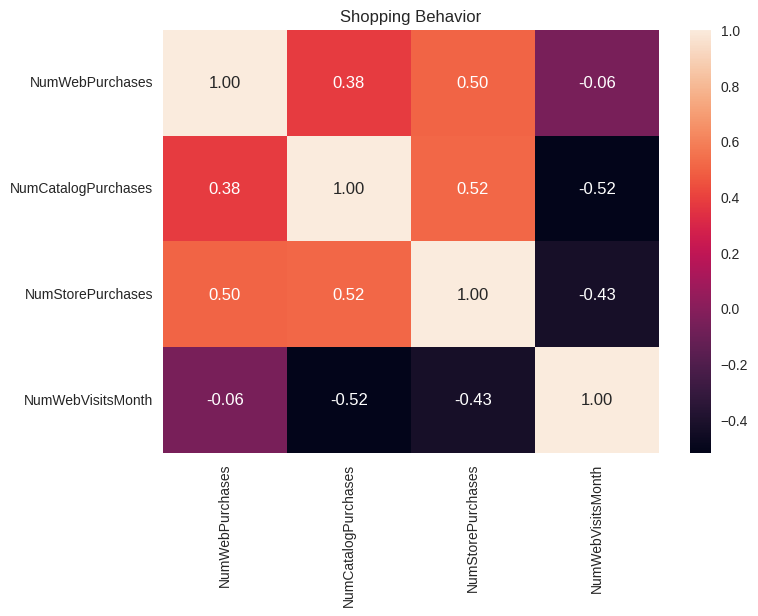

In [ ]:
ShopBehav = numData.loc[: , ['NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']]
sns.heatmap(ShopBehav.corr(), annot=True, fmt='0.2f')
plt.title('Shopping Behavior')
plt.show()

As for shopping behavior, there are a few moderately negative correlations between the number of web visits per month and the number of catalog purchases, and a few moderate positive correlations such as the number of store purchases and the number of catolog purchases.

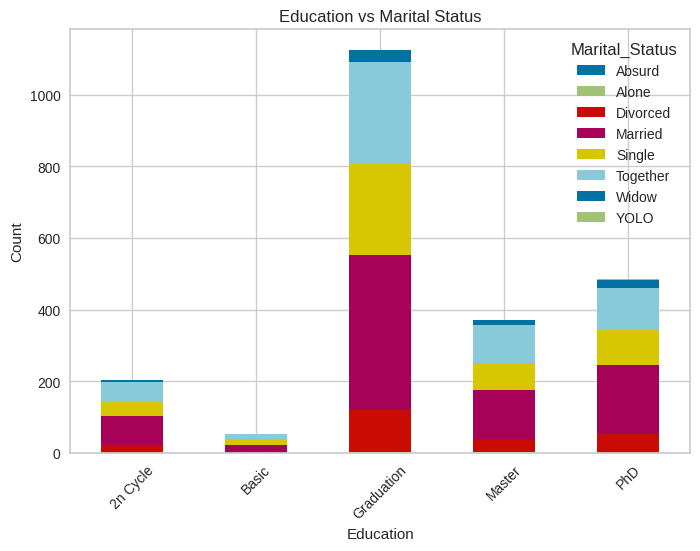

In [ ]:

contingency_table = pd.crosstab(data['Education'], data['Marital_Status'])

contingency_table.plot(kind='bar', stacked=True)
plt.ylabel('Count')
plt.title('Education vs Marital Status')
plt.xticks(rotation=45)
plt.show();


We see that the majority of customers are of 'Graduation' education status. In each category many customers are 'Married' compared to other marital statuses.

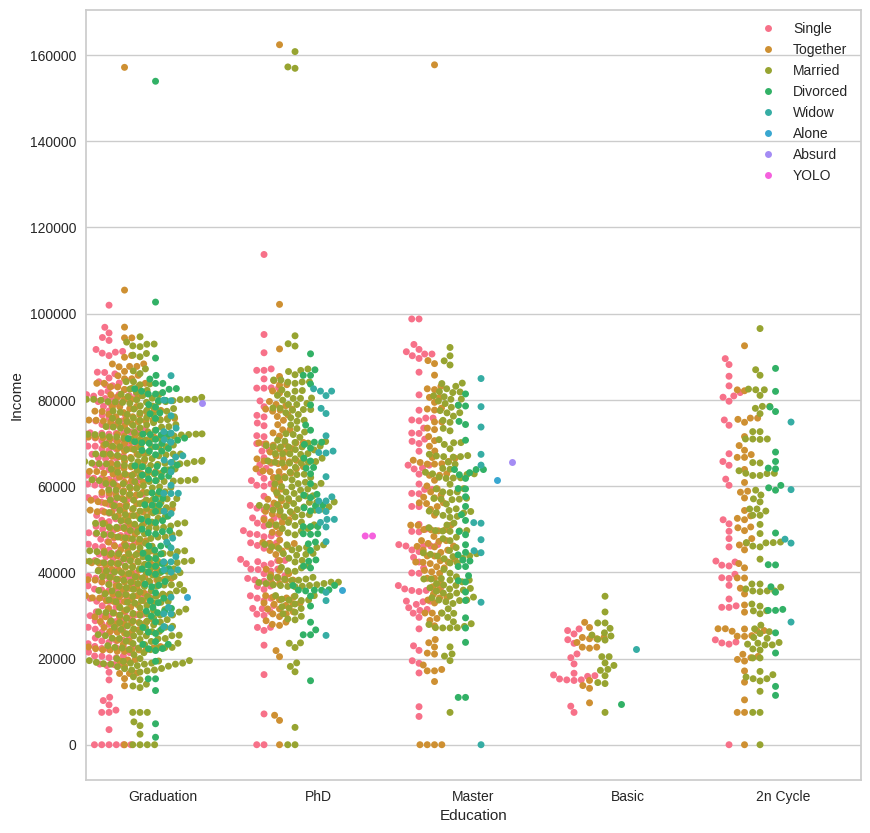

In [ ]:
plt.figure(figsize=(10,10))
sns.swarmplot(data=data, x = 'Education', y = 'Income', hue='Marital_Status', dodge=True)
plt.legend(loc='best')

Looking at the income levels given education and marital status, all categories excluding 'Basic' education level seem to have similar distributions of income.

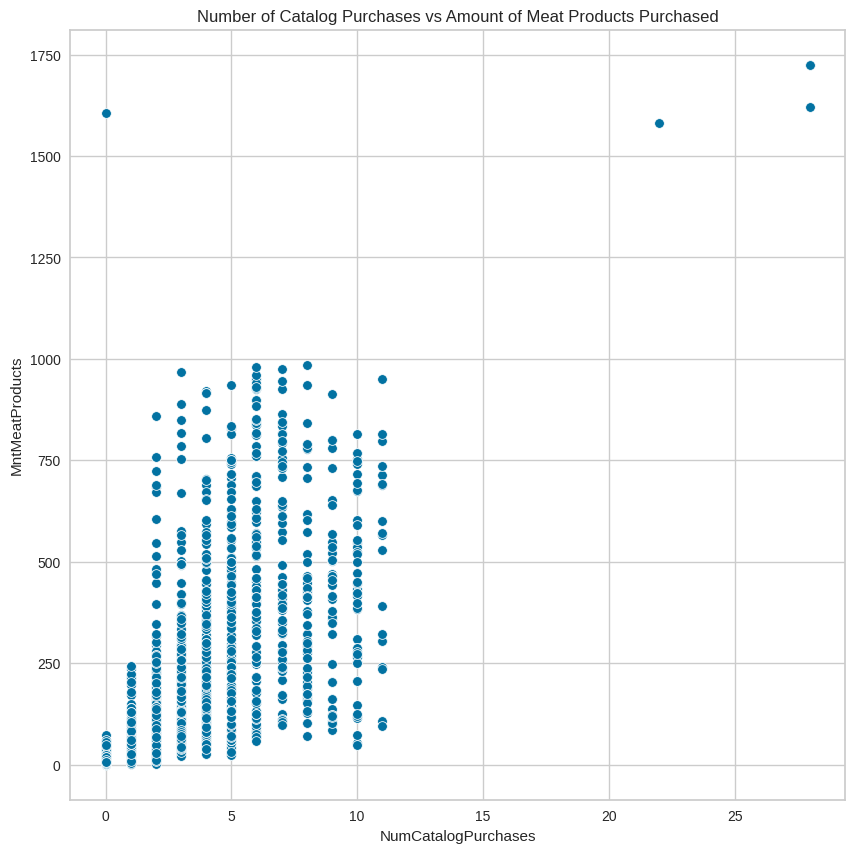

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Number of Catalog Purchases vs Amount of Meat Products Purchased')
sns.scatterplot(data=data, x='NumCatalogPurchases',y='MntMeatProducts');

From the large heatmap, we saw that these two variables had a correlation coefficient of 0.72. We know that these two variables are positively and more strongly correlated than the other variables.

## **K-means Clustering**

#### Selecting the appropriate number of clusters using the elbow Plot.

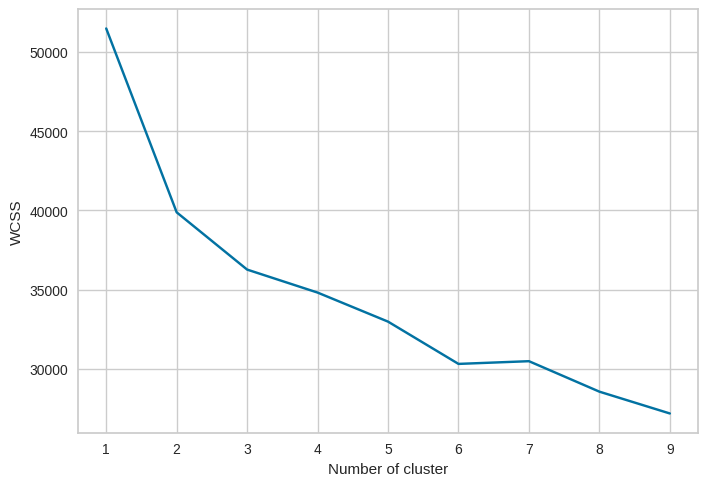

In [ ]:
# Write your code here
scaler=StandardScaler()
data_scaled=pd.DataFrame(scaler.fit_transform(numData), columns=numData.columns)
data_scaled_copy = data_scaled.copy(deep=True)

WCSS = {}

# iterate for a range of Ks and fit the scaled data to the algorithm. Use inertia attribute from the clustering object and
# store the inertia value for that k
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data_scaled)
    WCSS[k] = kmeans.inertia_

plt.figure()
plt.plot(list(WCSS.keys()), list(WCSS.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("WCSS")
plt.show()

##### **Observations:**

Looking at the plot, the WCSS seems to drop off after K = 6. So I can choose my K to be 6.

#### Finalizing appropriate number of clusters by checking the silhoutte score as well. Is the answer different from the elbow plot?

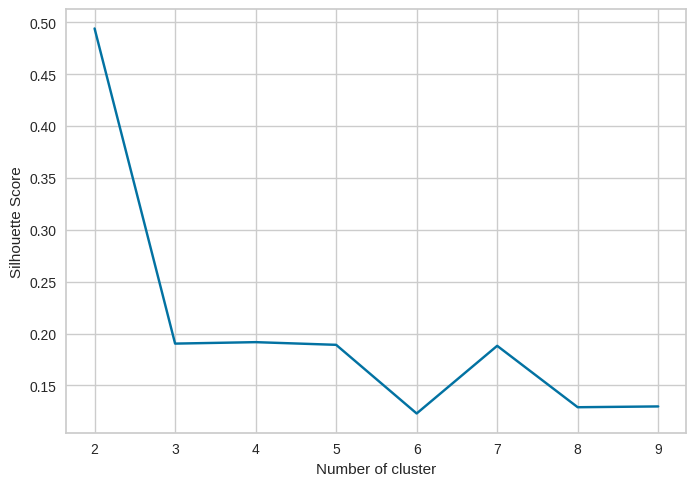

In [ ]:
#Empty dictionary to store the Silhouette score for each value of k
sc = {}

# iterate for a range of Ks and fit the scaled data to the algorithm. Store the Silhouette score for that k
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(data_scaled)
    labels = kmeans.predict(data_scaled)
    sc[k] = silhouette_score(data_scaled, labels)

#Elbow plot
plt.figure()
plt.plot(list(sc.keys()), list(sc.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score")
plt.show()

##### **Observations:**

My answer is now different from before, as the elbow seems to be more clearly at K=3. So my K will be 3.



#### Doing a final fit with the appropriate number of clusters.

In [ ]:
kmeans = KMeans(n_clusters=3, max_iter= 1000, random_state=1)
kmeans.fit(data_scaled)

#Adding predicted labels to the original data and scaled data
data_scaled_copy['Labels'] = kmeans.predict(data_scaled)
numData['Labels'] = kmeans.predict(data_scaled)

##### **Observations:**

To fit the data, it takes a very short time of less than one second.

## **Cluster Profiling and Comparison**

#### Performing cluster profiling using boxplots for the K-Means algorithm, and analyzing key characteristics of each cluster.

In [ ]:
numData.Labels.value_counts()

,count
Labels,
0,1190
1,830
2,219


In [ ]:
mean = numData.groupby('Labels').mean()
median = numData.groupby('Labels').median()
df_kmeans = pd.concat([mean, median], axis=0)
df_kmeans.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median']
df_kmeans.T

,group_0 Mean,group_1 Mean,group_2 Mean,group_0 Median,group_1 Median,group_2 Median
Year_Birth,1970.664706,1966.067470,1969.045662,1972.0,1966.0,1970.0
Income,36023.841176,65665.880723,81014.570776,36123.0,65816.5,81975.0
Kidhome,0.755462,0.102410,0.045662,1.0,0.0,0.0
Teenhome,0.511765,0.602410,0.114155,0.0,1.0,0.0
Recency,48.841176,49.312048,49.917808,49.0,50.0,53.0
MntWines,67.926050,503.062651,833.027397,27.0,459.5,847.0
MntFruits,5.363025,47.372289,60.283105,3.0,32.5,38.0
MntMeatProducts,30.891597,275.163855,496.817352,17.0,215.0,480.0
MntFishProducts,8.042017,65.586747,91.515982,4.0,46.0,75.0
MntSweetProducts,5.404202,46.974699,69.406393,3.0,32.0,51.0


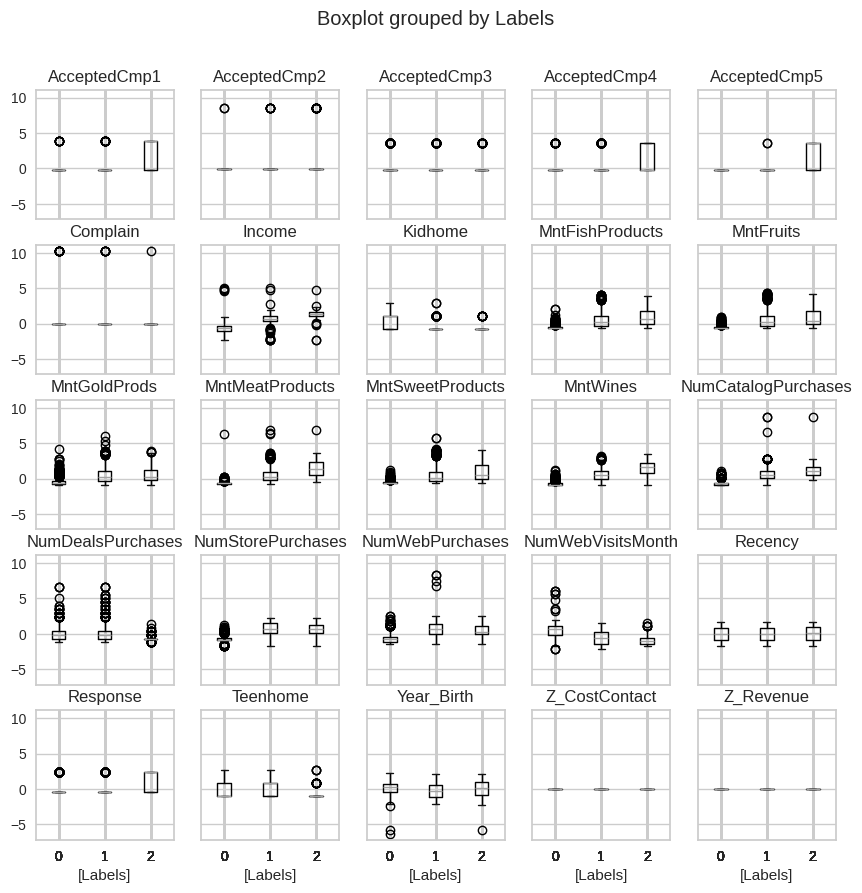

In [ ]:
data_scaled_copy.boxplot(by = 'Labels',layout=(5,5),figsize=(10,10))
plt.show()

##### **Observations:**

Looking at the boxplots, based on the data distributions at each label, we can see that there are more notable differences in the interquartile ranges across the labels when we look at customer shopping behavior and the amount of money spent on products.

More specifically, MntFishProducts, MntFruits, MntMeatProducts, MntSweetProducts, MntWines seem to have varying interquartile ranges. In these categories, we can see that through each label, customers can be separated based on low, moderate, and high across these variables. The clustering could have separated the customers based on the amounts that they have spent on products.

This same idea goes for NumCatalogPurchases, which describes the customers' shopping behavior.

Income levels also seem to have been differentiated in the clustering, with low, moderate, and higher income levels.

Other variables such as those in the first row and those in the last two rows, do not seem to have too many notable differences when looking at the boxplots.

Therefore, the customers can be best profiled by spending information and shopping behavior, being low, moderate, or high.

#### Performing cluster profiling on the data using a barplot for the K-Means algorithm.

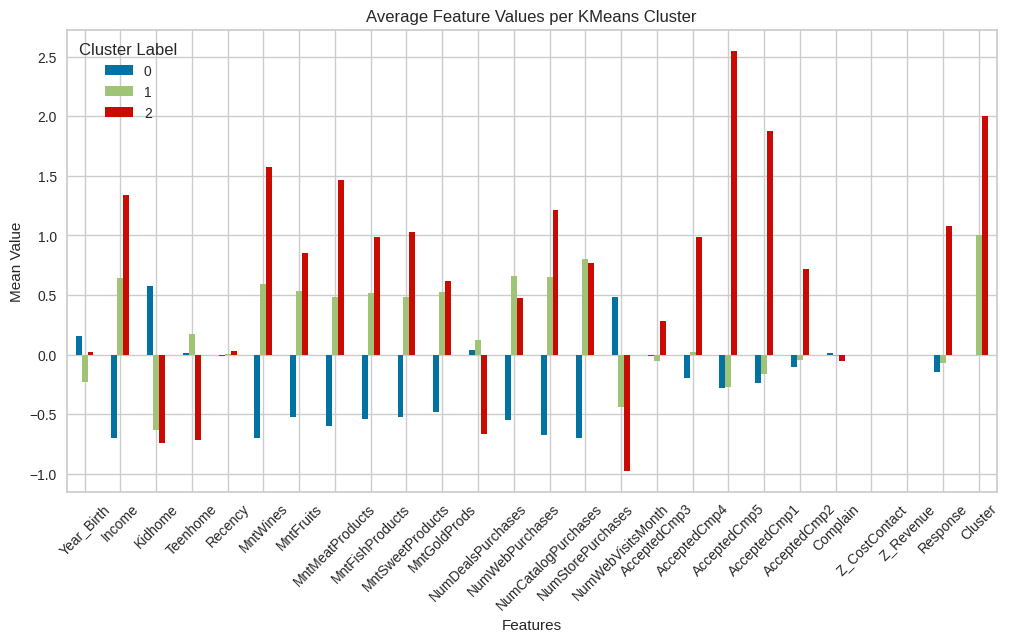

In [ ]:
cluster_means = data_scaled_copy.groupby('Labels').mean() # Using scaled data to plot

cluster_means.T.plot(kind='bar', figsize=(12, 6))


plt.title('Average Feature Values per KMeans Cluster')
plt.xlabel('Features')
plt.ylabel('Mean Value')
plt.xticks(rotation=45)
plt.legend(title='Cluster Label')
plt.show()

##### **Observations:**

Looking at the barplot, we can see that for the most part, the mean values of Cluster 2 among most variables tend to be higher-- especially across most of the Spending Information categories and the Campaign Interactions. We can profile these customers as 'Higher Spending and Interaction'.

Cluster 1 tends to have mean values closer to 0 across most variables when comparing them to the mean values of Cluster 0 and 2 in the same categories. We can consider these customers as 'Moderate Spending and Interaction'.

Finally, Cluster 0 tends to have negative mean values across almost all categories. We can then consider these customers as 'Low Spending and Interaction'.

## **Business Recommedations**

#### Business recommendations based on the clustering insights.

We can see from the first table of Question 10 that most customers are from Cluster 0.

Cluster 0 tends to have lower interaction and lower spending compared to the other Clusters. In this case, we should focus on building more interaction and spending. Perhaps emails to these customers with reminders or basic promotions and discounts could help. It could also be helpful to have customers fill out exit surveys as to why they may be leaving as customers, or fill out feedback forms in order to know which aspects of the business could be further improved. I think that much investment could be towards this cluster since it is the largest.

Cluster 1 has moderate interaction and moderate spending. For these customers, it would be helpful to try to get them to spend more. More targetted campaigns could be helpful, as well as limited-time discounts could get these customers to spend more. These could increase spending habits. Conversely, we could also upsell some more expensive items so that they spend more money.

Cluster 2 has the high spenders and interactions. These customers are more likely to respond to campaigns, so we could continue catering some campaigns towards these customers for retention purposes. Also for retention, we could implement loyalty programs and rewards. This would not only retain customers in this cluster, but also entice those from other clusters to join, which would increase spending under the incentive of the rewards.